training r2 score:  0.9825030732137464
test r2 score:  0.9782562732448847


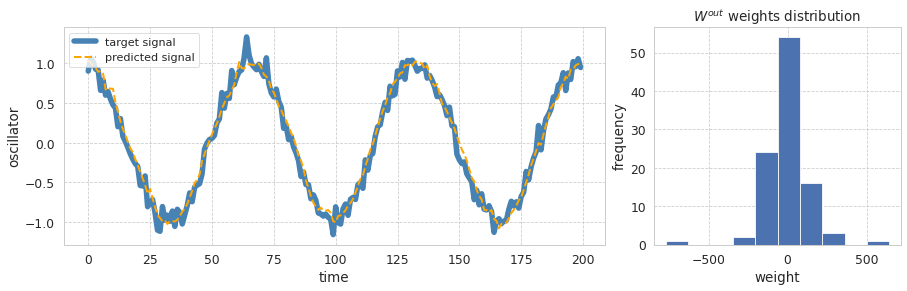

In [1]:
"""
=========================================================
ESNRegressor example
=========================================================

This example shows a minimal example of Echo State Network
applied to a regression problem.
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from echoes import ESNRegressor
from echoes.plotting import set_mystyle

set_mystyle()  # optional: set aesthetics


# Prepare synthetic data 
x = np.linspace(0, 30*np.pi, 1000).reshape(-1,1)
inputs = np.sin(x) + np.random.normal(scale=.1, size=x.shape)
outputs = np.cos(x) + np.random.normal(scale=.1, size=x.shape)

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=.3, shuffle=False)

esn = ESNRegressor(
    spectral_radius=.95,
    leak_rate=.4,
    n_transient=100,    
    regression_method="pinv",
    random_state=42
)
esn.fit(X_train, y_train)

print("training r2 score: ", esn.score(X_train, y_train))
print("test r2 score: ", esn.score(X_test, y_test))

# Get prediction for plotting
y_pred = esn.predict(X_test)

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, (1, 2))
plt.plot(y_test[esn.n_transient:], label='target signal',
         color="steelblue", linewidth=5.5)
plt.plot(y_pred[esn.n_transient:], label='predicted signal',
         linestyle='--', color="orange",  linewidth=2,)
plt.ylabel("oscillator")
plt.xlabel('time')
plt.legend(fontsize=("small"), loc=2)

plt.subplot(1, 3, 3)
plt.title(r"$W^{out}$ weights distribution")
plt.xlabel('weight')
plt.ylabel('frequency')
plt.hist(esn.W_out_.flat);